# Time Series Forecasting con Transformers de Hugging Face
# Dataset: Precio de Bitcoin en USD (BTC-USD)

In [2]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mae, rmse, mape
from darts.models import TransformerModel, NHiTSModel, TFTModel
import random
import torch

In [4]:
# Descargar y descomprimir el dataset desde Kaggle usando curl directo
zip_path = "bitcoin-historical-data.zip"
csv_filename = "btcusd_1-min_data.csv"

if not os.path.exists(csv_filename):
    if not os.path.exists(zip_path):
        !curl -L -o bitcoin-historical-data.zip \
            https://www.kaggle.com/api/v1/datasets/download/mczielinski/bitcoin-historical-data
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(".")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 94.5M  100 94.5M    0     0  13.2M      0  0:00:07  0:00:07 --:--:-- 22.2M


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics      


Entrenando con ventana de 1_año (365 días)

Entrenando modelos con ventana 1_año...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 248 K  | train
-------------------------------------------------------------
240 K     Traina

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork     

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

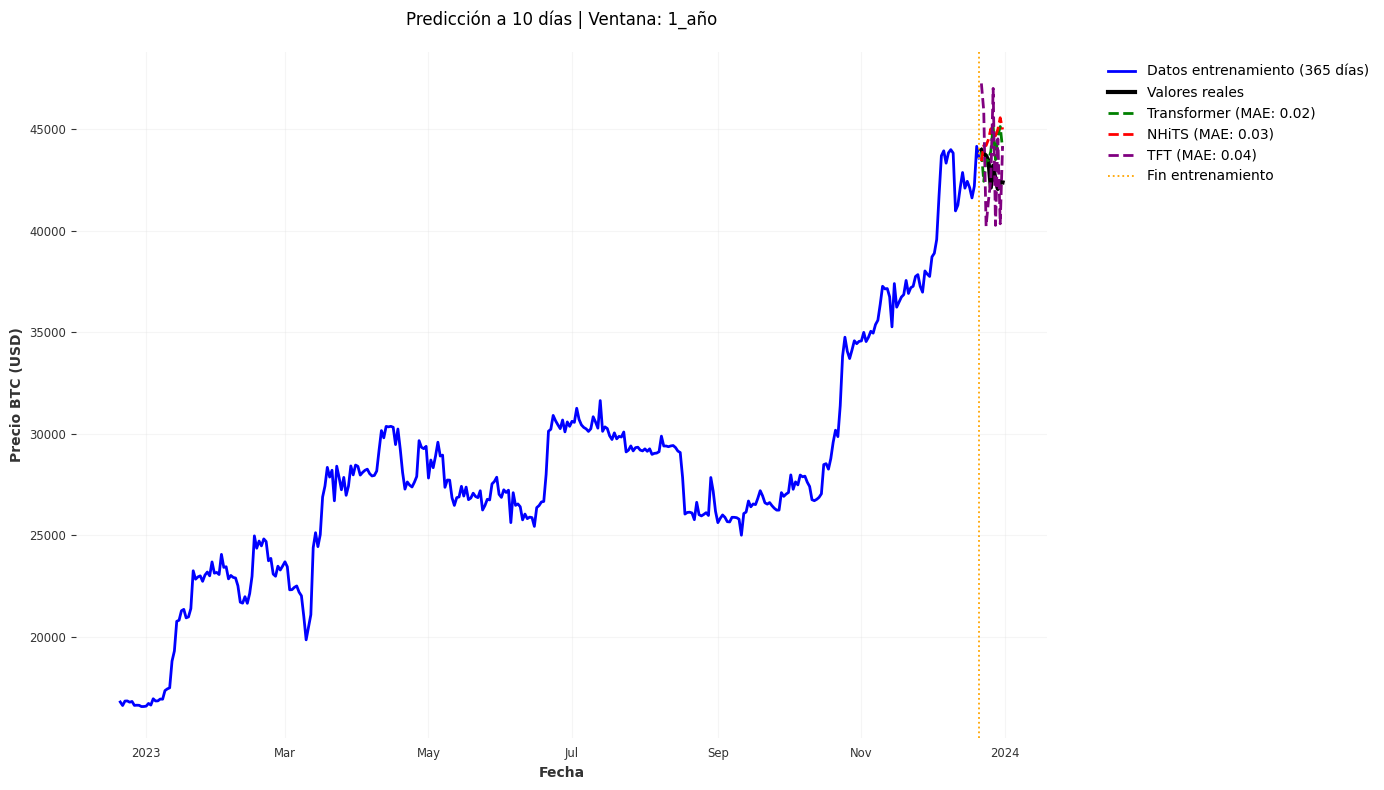

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics      


Entrenando con ventana de 6_meses (180 días)

Entrenando modelos con ventana 6_meses...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 248 K  | train
-------------------------------------------------------------
240 K     Traina

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork     

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

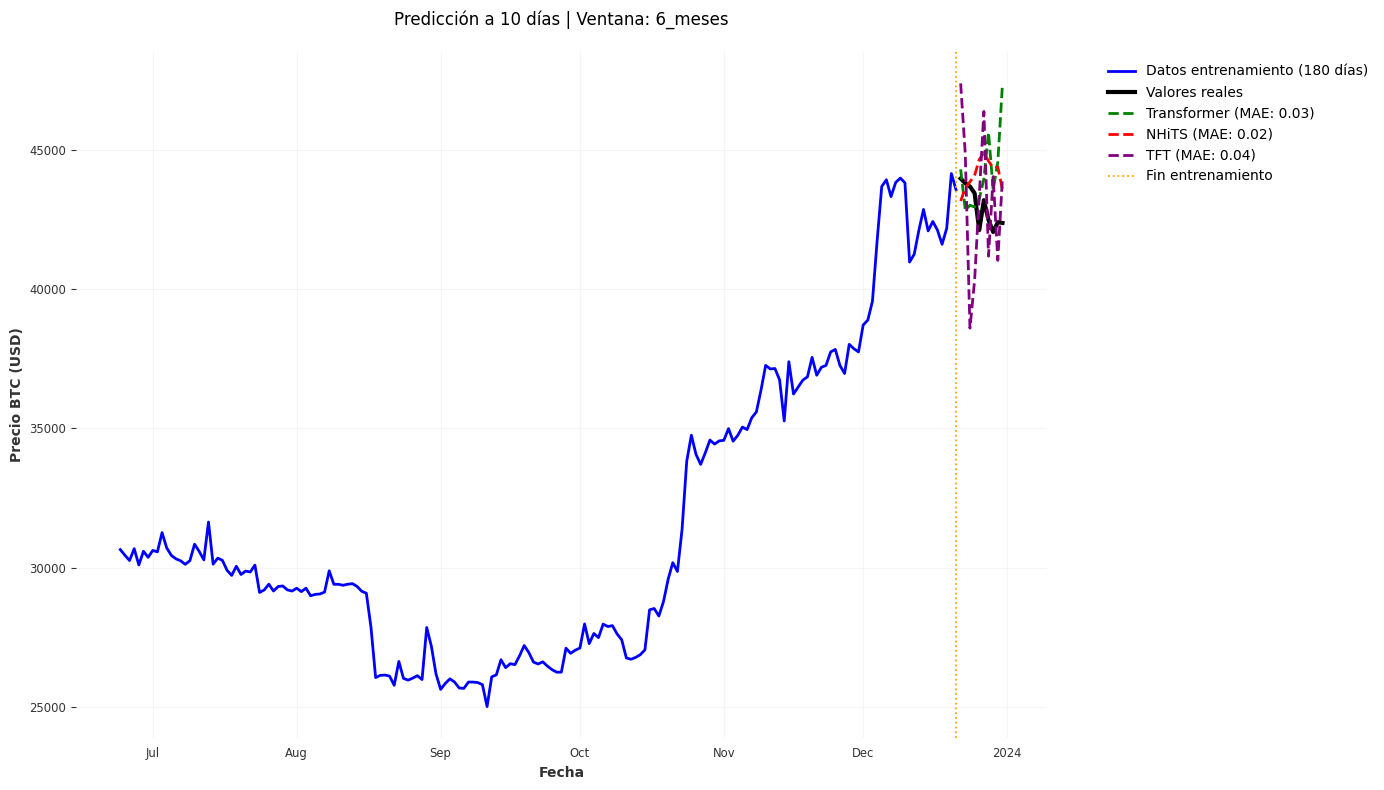

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics      


Entrenando con ventana de 3_meses (90 días)

Entrenando modelos con ventana 3_meses...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 227 K  | train
-------------------------------------------------------------
223 K     Traina

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork     

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

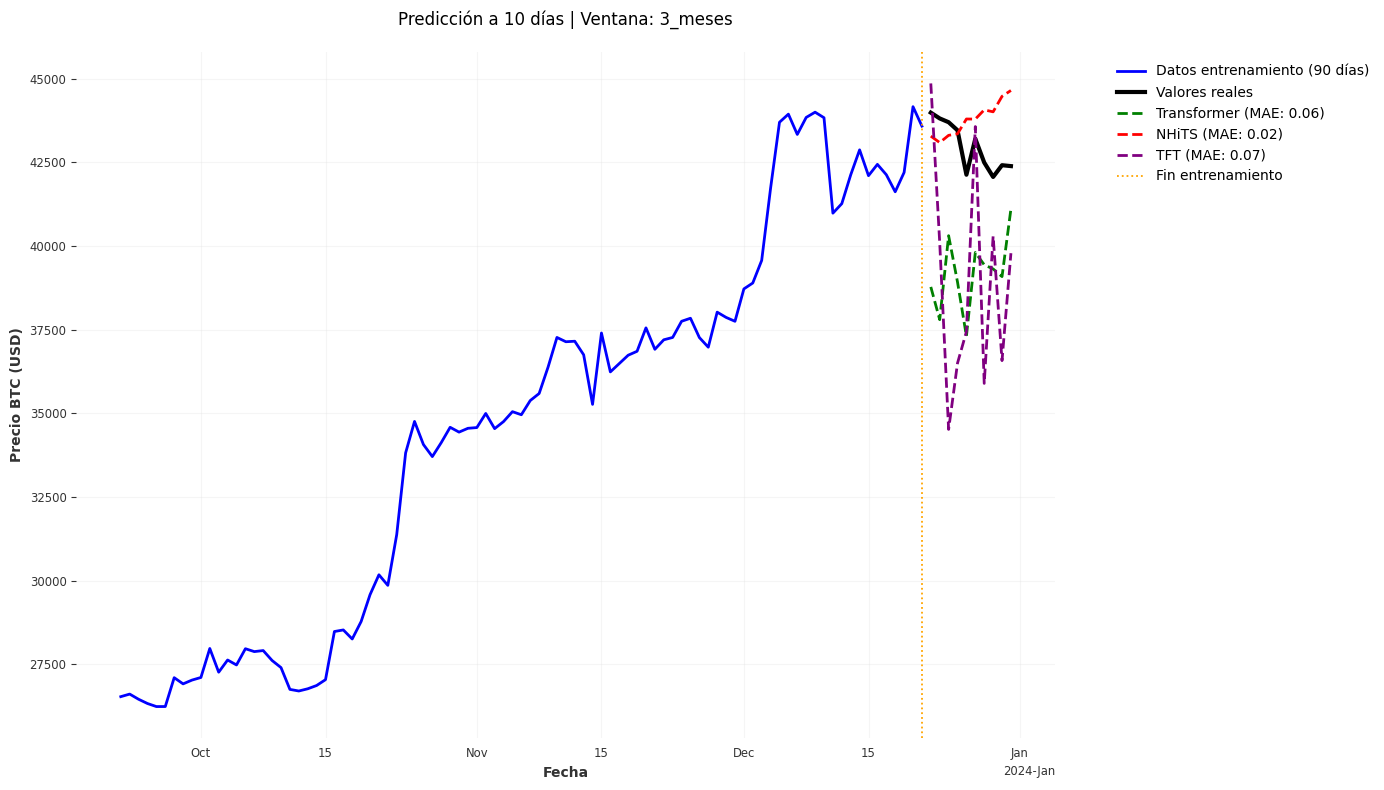


Resultados Comparativos:
| Ventana   |   Días |   Transformer_MAE |   Transformer_MAPE |   Transformer_RMSE |   NHiTS_MAE |   NHiTS_MAPE |   NHiTS_RMSE |   TFT_MAE |   TFT_MAPE |   TFT_RMSE |
|:----------|-------:|------------------:|-------------------:|-------------------:|------------:|-------------:|-------------:|----------:|-----------:|-----------:|
| 1_año     |    365 |         0.021339  |            3.56183 |          0.0261209 |   0.0282762 |      4.72461 |    0.0328347 | 0.0374988 |    6.17334 |  0.0403618 |
| 6_meses   |    180 |         0.0256891 |            4.28677 |          0.033854  |   0.0217047 |      3.62424 |    0.0255038 | 0.0372264 |    6.11805 |  0.0422289 |
| 3_meses   |     90 |         0.0601287 |            9.90392 |          0.0636139 |   0.0191144 |      3.19146 |    0.0224523 | 0.067778  |   11.1989  |  0.0806628 |


In [6]:
# Establecer todas las semillas para reproducibilidad
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

# Fechas fijas para el análisis
START_DATE = '2020-01-01'
END_DATE = '2023-12-31'
PREDICTION_HORIZON = 10  # 10 días hacia adelante

# Cargar y preparar datos
df = pd.read_csv("btcusd_1-min_data.csv")
df['date'] = pd.to_datetime(df['Timestamp'], unit='s')
df = df.rename(columns={'Close': 'price'})
df = df[['date', 'price']].dropna()
df = df[(df['date'] >= START_DATE) & (df['date'] <= END_DATE)]
df_daily = df.set_index('date').resample('D').last().ffill()

# Convertir a serie temporal
series = TimeSeries.from_dataframe(df_daily.reset_index(), 'date', 'price')
scaler = Scaler()
series_scaled = scaler.fit_transform(series)
series_unscaled = scaler.inverse_transform(series_scaled)

# Configuraciones de ventanas históricas a probar
WINDOW_CONFIGS = {
    '1_año': 365,
    '6_meses': 180,
    '3_meses': 90,
}

results = []

for config_name, window_size in WINDOW_CONFIGS.items():
    print(f"\n{'='*50}")
    print(f"Entrenando con ventana de {config_name} ({window_size} días)")
    print(f"{'='*50}")

    # Definir períodos de entrenamiento y prueba
    train_end = series.time_index[-PREDICTION_HORIZON-1]
    train_start = train_end - pd.Timedelta(days=window_size)
    test_start = train_end + pd.Timedelta(days=1)
    test_end = test_start + pd.Timedelta(days=PREDICTION_HORIZON-1)

    # Crear subseries
    train = series_scaled.slice(train_start, train_end)
    test = series_scaled.slice(test_start, test_end)

    # Configuración común de modelos
    common_args = {
        'input_chunk_length': min(60, window_size//3),
        'output_chunk_length': PREDICTION_HORIZON,
        'random_state': SEED,
        'n_epochs': 100,
        'batch_size': 32,
        'optimizer_kwargs': {'lr': 1e-3},
        'model_name': f'{config_name}_model'
    }

    # Inicializar modelos
    transformer = TransformerModel(
        **common_args,
        d_model=64,
        nhead=4,
        num_encoder_layers=3,
        num_decoder_layers=3,
        dropout=0.1
    )

    nhits = NHiTSModel(
        **common_args,
        num_blocks=2,
        num_layers=3,
        layer_widths=128,
        dropout=0.1
    )

    tft = TFTModel(
        **common_args,
        hidden_size=64,
        lstm_layers=2,
        dropout=0.1,
        add_relative_index=True
    )

    # Entrenamiento
    print(f"\nEntrenando modelos con ventana {config_name}...")
    transformer.fit(train, verbose=True)
    nhits.fit(train, verbose=True)
    tft.fit(train, verbose=True)

    # Predicción
    pred_trans = transformer.predict(n=PREDICTION_HORIZON)
    pred_nhits = nhits.predict(n=PREDICTION_HORIZON)
    pred_tft = tft.predict(n=PREDICTION_HORIZON)

    # Cálculo de métricas
    def calc_metrics(pred):
        return {
            'MAE': mae(test, pred),
            'MAPE': mape(test, pred),
            'RMSE': rmse(test, pred)
        }

    metrics_trans = calc_metrics(pred_trans)
    metrics_nhits = calc_metrics(pred_nhits)
    metrics_tft = calc_metrics(pred_tft)

    # Almacenar resultados
    results.append({
        'Ventana': config_name,
        'Días': window_size,
        'Transformer_MAE': metrics_trans['MAE'],
        'Transformer_MAPE': metrics_trans['MAPE'],
        'Transformer_RMSE': metrics_trans['RMSE'],
        'NHiTS_MAE': metrics_nhits['MAE'],
        'NHiTS_MAPE': metrics_nhits['MAPE'],
        'NHiTS_RMSE': metrics_nhits['RMSE'],
        'TFT_MAE': metrics_tft['MAE'],
        'TFT_MAPE': metrics_tft['MAPE'],
        'TFT_RMSE': metrics_tft['RMSE']
    })

    # Preparar datos para visualización
    test_unscaled = scaler.inverse_transform(test)
    pred_trans_unscaled = scaler.inverse_transform(pred_trans)
    pred_nhits_unscaled = scaler.inverse_transform(pred_nhits)
    pred_tft_unscaled = scaler.inverse_transform(pred_tft)

    # Visualización
    plt.figure(figsize=(14, 8))

    # 1. Graficar datos históricos de entrenamiento
    series_unscaled.slice(train_start, train_end).plot(
        label=f'Datos entrenamiento ({window_size} días)',
        color='blue',
        linewidth=2)

    # 2. Graficar valores reales del período de prueba
    test_unscaled.plot(label='Valores reales', color='black', linewidth=3)

    # 3. Graficar predicciones
    pred_trans_unscaled.plot(
        label=f'Transformer (MAE: {metrics_trans["MAE"]:.2f})',
        color='green',
        linestyle='--',
        linewidth=2)

    pred_nhits_unscaled.plot(
        label=f'NHiTS (MAE: {metrics_nhits["MAE"]:.2f})',
        color='red',
        linestyle='--',
        linewidth=2)

    pred_tft_unscaled.plot(
        label=f'TFT (MAE: {metrics_tft["MAE"]:.2f})',
        color='purple',
        linestyle='--',
        linewidth=2)

    # 4. Línea vertical para marcar fin de entrenamiento
    plt.axvline(x=train_end, color='orange', linestyle=':',
               label='Fin entrenamiento')

    # Configuración del gráfico
    plt.title(f'Predicción a {PREDICTION_HORIZON} días | Ventana: {config_name}', pad=20)
    plt.xlabel('Fecha')
    plt.ylabel('Precio BTC (USD)')
    plt.grid(True, alpha=0.3)

    # Leyenda
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Resultados comparativos
results_df = pd.DataFrame(results)
print("\nResultados Comparativos:")
print(results_df.to_markdown(index=False))